# 2Layer FF NN TensorFlow
## Tensorflow version of the Vanilla FF NN 

In [29]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline


#load data
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets("../data", one_hot=True)

Extracting ../data/train-images-idx3-ubyte.gz
Extracting ../data/train-labels-idx1-ubyte.gz
Extracting ../data/t10k-images-idx3-ubyte.gz
Extracting ../data/t10k-labels-idx1-ubyte.gz


In [30]:
# usual sanity check
print("analyse loaded data:\n")
print(" Training images - {}\n Training labels - {}".format(len(data.train.images), len(data.train.labels)))
print(" Test images - {}\n Test labels - {}".format(len(data.test.images), len(data.test.labels)))

analyse loaded data:

 Training images - 55000
 Training labels - 55000
 Test images - 10000
 Test labels - 10000


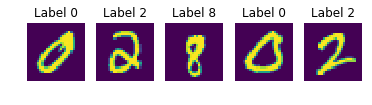

In [32]:
# visualise data
samples = np.random.randint(55000, size=(5))
for idx, sample in enumerate(samples):
    image = data.train.images[sample].reshape(28,28)
    labelVal = np.argmax(data.train.labels[sample], axis= 0)
    label = "Label "+ str(labelVal)
    
    plt.subplot(1,5,idx+1)
    plt.imshow(image)
    plt.axis('off')
    plt.title(label)

In [ ]:
# we can see that data is already one-hot encoded
#images are stored in 1D vector form

In [47]:
y_test_ints = np.array([label.argmax() for label in data.test.labels])
y_train_ints = np.argmax(data.train.labels, axis=0)

In [34]:
#get vector dims
image_size = data.train.images[0].size
print("image size {}".format(image_size))

num_classes = data.train.labels[0].size
print("num classes {}".format(num_classes))

hidden_size = 50

image size 784
num classes 10


In [57]:
#Create TF Placeholders - for values that we will inject into computational graph

x = tf.placeholder(tf.float32, [None, image_size])
y_true = tf.placeholder(tf.float32, [None, num_classes])
y_class_num = tf.placeholder(tf.int64, [None])

#Create TF variables - for values which are intrinsic to the model and exist within the comp graph
w1 = tf.Variable(tf.zeros([image_size, num_classes]))
b1 = tf.Variable(tf.zeros([num_classes]))
w2 = tf.Variable(tf.zeros([hidden_size, num_classes]))
b2 = tf.Variable(tf.zeros([num_classes]))

#Define computational graph topology
scores = tf.matmul(x, w1) + b1
#z1_relu = tf.nn.relu(z1)
#scores = tf.matmul(z1_relu, w2) + b2

#Define probability calculations
predictions = tf.nn.softmax(scores)
predicted_class = tf.argmax(predictions, axis=1)

#define loss calcs
total_loss = tf.nn.softmax_cross_entropy_with_logits(logits=scores, labels=y_true)
mean_loss = tf.reduce_mean(total_loss)

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(mean_loss)


#have TF compute accuracy
correct_prediction = tf.equal(predicted_class, y_class_num)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


In [58]:
# Prepare model for training Run 
session = tf.Session()

# Initialize variables
session.run(tf.global_variables_initializer())

batch_size = 100

def train(num_its):
    for i in range(num_its):
        x_batch, y_batch = data.train.next_batch(batch_size)
        
        training_feed_dict = {x: x_batch, y_true: y_batch}
        
        session.run(optimizer, feed_dict=training_feed_dict)
        


In [61]:
train(1000)

In [62]:
# test
test_feed_dict = {x: data.test.images, y_true: data.test.labels, y_class_num: y_test_ints}
acc = session.run(accuracy, feed_dict=test_feed_dict)
print("test set accuracy is {0:.1%}".format(acc))

test set accuracy is 91.8%


In [63]:
session.close()

In [ ]:
# second layer of the network was removed because it overfit the training data